### Objective: Initial EDA of cleaned data

#### Visualizations of national and regional/provincial price data

In [1]:
import requests
import pandas as pd
from stats_can import StatsCan
sc = StatsCan(data_folder='../data_sources/raw_data/')
import matplotlib.pyplot as plt
import numpy as np

##### Provincial data

In [2]:
# download provincial MRA table (provincial data, 2017 - 2023)
provincial_MRA = sc.table_to_df("181-002-45-01")

In [3]:
# create list of irrelevant products
irrelevant = ['Baby food', 'Infant formula', 'Deodorant', 'Toothpaste', 'Shampoo', 'Laundry detergent', 'Paper towels', 'tissue', 'Cigarettes', 'gasoline']

# remove rows where the product is irrelevant

for term in irrelevant:
    provincial_MRA = provincial_MRA[~provincial_MRA.Products.str.contains(term)]

provincial_MRA

,REF_DATE,GEO,DGUID,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017-01-01,Canada,2016A000011124,"Beef stewing cuts, per kilogram",Dollars,81,units,0,v1353834271,11.1,12.66,NaN,NaN,NaN,2
1,2017-01-01,Canada,2016A000011124,"Beef striploin cuts, per kilogram",Dollars,81,units,0,v1353834272,11.2,21.94,NaN,NaN,NaN,2
2,2017-01-01,Canada,2016A000011124,"Beef top sirloin cuts, per kilogram",Dollars,81,units,0,v1353834273,11.3,13.44,NaN,NaN,NaN,2
3,2017-01-01,Canada,2016A000011124,"Beef rib cuts, per kilogram",Dollars,81,units,0,v1353834311,11.41,20.17,NaN,NaN,NaN,2
4,2017-01-01,Canada,2016A000011124,"Ground beef, per kilogram",Dollars,81,units,0,v1353834274,11.4,9.12,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99129,2023-10-01,British Columbia,2016A000259,"Pasta sauce, 650 millilitres",Dollars,81,units,0,v1458870255,10.105,3.18,NaN,NaN,NaN,2
99130,2023-10-01,British Columbia,2016A000259,"Salad dressing, 475 millilitres",Dollars,81,units,0,v1458870257,10.106,3.35,NaN,NaN,NaN,2
99131,2023-10-01,British Columbia,2016A000259,"Almonds, 200 grams",Dollars,81,units,0,v1458870235,10.107,4.80,NaN,NaN,NaN,2
99132,2023-10-01,British Columbia,2016A000259,"Peanuts, 450 grams",Dollars,81,units,0,v1458870256,10.108,3.86,NaN,NaN,NaN,2


In [7]:
# remove irrelevant columns
provincial_MRA_filtered = provincial_MRA[['REF_DATE', 'GEO', 'Products', 'VECTOR', 'VALUE']]
provincial_MRA_filtered.rename(columns={'REF_DATE': 'date', 'GEO':'location', 'VALUE': 'price', 'Products': 'product', 'VECTOR': 'vectorid'}, inplace=True)

C:\Users\maddy\AppData\Local\Temp\ipykernel_4188\3489741586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincial_MRA_filtered.rename(columns={'REF_DATE': 'date', 'GEO':'location', 'VALUE': 'price', 'Products': 'product', 'VECTOR': 'vectorid'}, inplace=True)


In [8]:
provincial_MRA_filtered.dtypes

date        datetime64[ns]
location          category
product             object
vectorid          category
price              float64
dtype: object

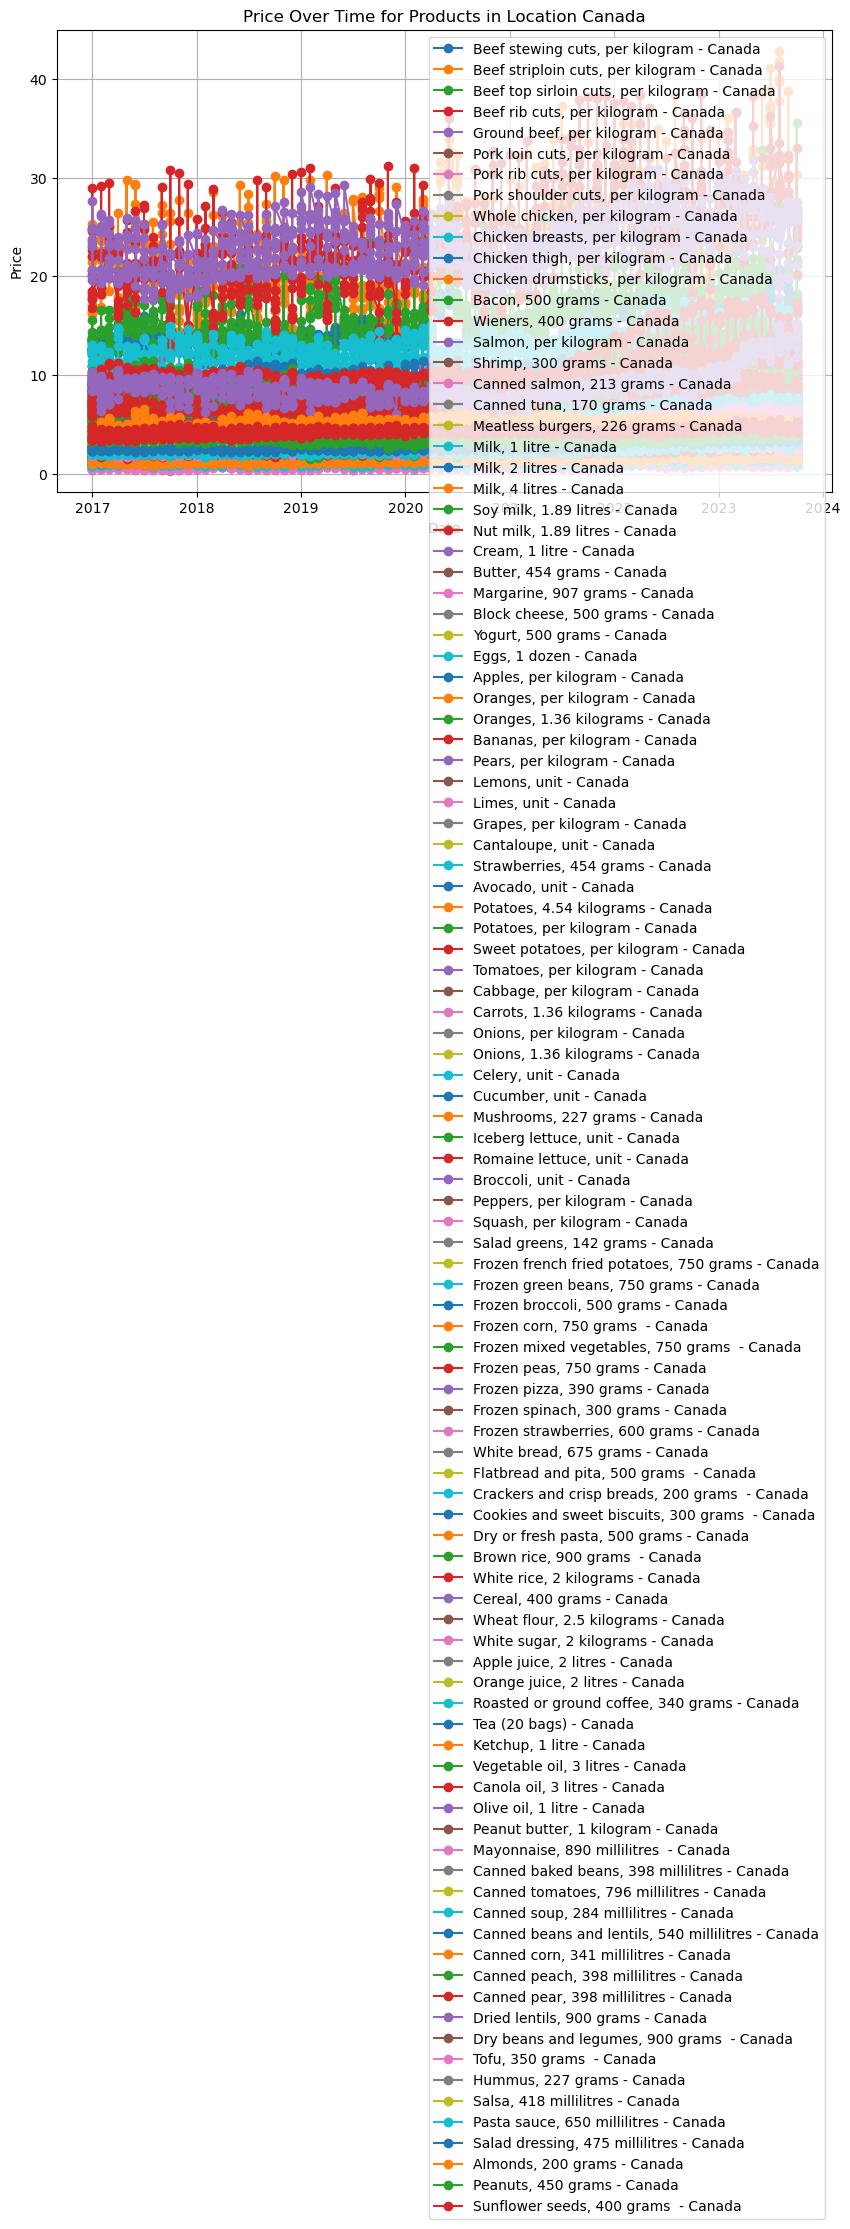

In [10]:
products = provincial_MRA_filtered['product'].unique().tolist()

# Filter data based on location and product
location_to_plot = 'Canada'
product_to_plot = products
filtered_data = provincial_MRA_filtered

# Create a line plot
plt.figure(figsize=(10, 6))
for product in product_to_plot:
        product_data = filtered_data[filtered_data['product'] == product]
        plt.plot(product_data['date'], product_data['price'], marker='o', label=f'{product} - {location_to_plot}')

# Customize the plot
plt.title(f'Price Over Time for Products in Location {location_to_plot}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
provincial_MRA_filtered.to_csv('../data_sources/raw_data/provincial_MRA.csv')

##### National data

In [4]:
# retrieve table data for national MRA prices (1995 - 2022)
national_MRA = sc.table_to_df("18-10-0002-01")

In [5]:
# remove rows where the product is irrelevant
for term in irrelevant:
    national_MRA = national_MRA[~national_MRA.Products.str.contains(term)]

national_MRA

,REF_DATE,GEO,DGUID,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1995-01-01,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,10.17,NaN,NaN,NaN,2
1,1995-01-01,Canada,2016A000011124,"Sirloin steak, 1 kilogram",Dollars,81,units,0,v735176,1.2,11.25,NaN,NaN,NaN,2
2,1995-01-01,Canada,2016A000011124,"Prime rib roast, 1 kilogram",Dollars,81,units,0,v735187,1.3,12.08,NaN,NaN,NaN,2
3,1995-01-01,Canada,2016A000011124,"Blade roast, 1 kilogram",Dollars,81,units,0,v735198,1.4,7.23,NaN,NaN,NaN,2
4,1995-01-01,Canada,2016A000011124,"Stewing beef, 1 kilogram",Dollars,81,units,0,v735209,1.5,7.12,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18502,2022-02-01,Canada,2016A000011124,"Coffee, instant, 200 grams",Dollars,81,units,0,v735202,1.43,7.10,NaN,NaN,NaN,2
18503,2022-02-01,Canada,2016A000011124,Tea (72 bags),Dollars,81,units,0,v735203,1.44,4.49,NaN,NaN,NaN,2
18504,2022-02-01,Canada,2016A000011124,"Cooking or salad oil, 1 litre",Dollars,81,units,0,v735204,1.45,4.45,NaN,NaN,NaN,2
18505,2022-02-01,Canada,2016A000011124,"Soup, canned, 284 millilitres",Dollars,81,units,0,v735205,1.46,1.28,NaN,NaN,NaN,2


In [6]:
# remove irrelevant columns
national_MRA_filtered = national_MRA[['REF_DATE', 'GEO', 'Products', 'VECTOR', 'VALUE']]
national_MRA_filtered.rename(columns={'REF_DATE': 'date', 'GEO':'location', 'VALUE': 'price', 'Products': 'product', 'VECTOR': 'vectorid'}, inplace=True)

C:\Users\maddy\AppData\Local\Temp\ipykernel_4188\1905751033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_MRA_filtered.rename(columns={'REF_DATE': 'date', 'GEO':'location', 'VALUE': 'price', 'Products': 'product', 'VECTOR': 'vectorid'}, inplace=True)


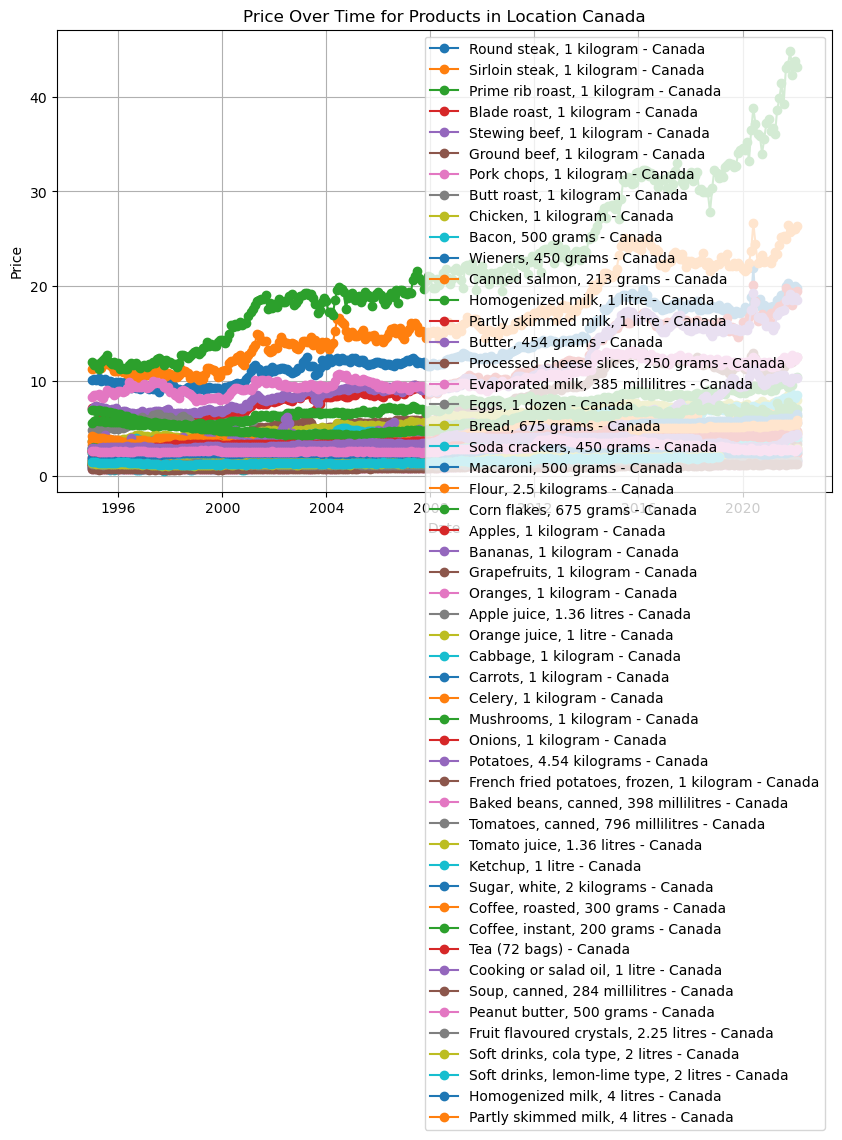

In [11]:
products = national_MRA_filtered['product'].unique().tolist()

# Filter data based on location and product
location_to_plot = 'Canada'
product_to_plot = products
filtered_data = national_MRA_filtered

# Create a line plot
plt.figure(figsize=(10, 6))
for product in product_to_plot:
        product_data = filtered_data[filtered_data['product'] == product]
        plt.plot(product_data['date'], product_data['price'], marker='o', label=f'{product} - {location_to_plot}')

# Customize the plot
plt.title(f'Price Over Time for Products in Location {location_to_plot}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
national_MRA_filtered.to_csv('../data_sources/raw_data/national_MRA.csv')